<a href="https://colab.research.google.com/github/Rithvikchowdary/Banking/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn pandas matplotlib


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
df = pd.read_excel("/content/mlp.xlsx")  # Replace with your actual file

# Check the first few rows
df.head()

,CustNo,Active_Policies,Expiring_Within_3_Months,Expiring_Within_6_Months,Cancelled_Within_3_Months,Total_Full_Term_Premium,Total_Coverage,Prior_Pol_Count,Prior_Premium,Prior_Coverage,...,Decile,Premium Sensitivity Score,Coverage Utilization Index,RGI,policy_volatality_index,Retention Fatigue Index,Premium_to_Coverage_Ratio,RGI_buckets,Premium_to_Coverage_buckets,Coverage Utilization Index_buckets
0,479634,2,1,2,0,7259.87,219000.0,16,34967.30,1433064,...,1,-0.792359,-0.847180,4.000000,3.0,-0.140187,3.315009,4-12,>2,<0
1,858995,2,2,2,0,669.67,15000.0,10,4459.13,45000,...,1,-0.849630,-0.666652,3.666667,1.5,-0.187500,4.464467,<4,>2,<0
2,136353,1,0,0,0,2072.12,363000.0,16,21927.42,2890400,...,1,-0.905460,-0.874412,7.000000,2.0,-0.100719,0.570832,4-12,0.5-2,<0
3,796140,1,0,0,0,3459.30,348000.0,4,10320.00,1030000,...,1,-0.664732,-0.662135,4.000000,1.0,-0.072727,0.994052,4-12,0.5-2,<0
4,598812,1,0,0,0,811.66,0.0,12,9927.73,1005000,...,1,-0.918151,-0.999999,11.000000,1.0,-0.127907,0.000000,4-12,<0.5,<0


In [23]:
# Check for missing values
df.isnull().sum()

,0
CustNo,0
Active_Policies,0
Expiring_Within_3_Months,0
Expiring_Within_6_Months,0
Cancelled_Within_3_Months,0
Total_Full_Term_Premium,0
Total_Coverage,0
Prior_Pol_Count,0
Prior_Premium,0
Prior_Coverage,0


In [22]:
df['Total_Coverage'] = df['Total_Coverage'].fillna(df['Total_Coverage'].mean())

In [26]:
selected_features = ["RGI", "policy_volatality_index", "Retention Fatigue Index"]
X = df[selected_features]  # Only these 3 variables
y = df["Attrition_Flag"]  # Target variable (0 or 1)


In [27]:
# Split data into training, validation, and test sets (80-10-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [28]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input shape is (3,)
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=1024,
    verbose=1
)


Epoch 1/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8541 - loss: 0.4279 - val_accuracy: 0.8582 - val_loss: 0.3839
Epoch 2/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8576 - loss: 0.3854 - val_accuracy: 0.8582 - val_loss: 0.3830
Epoch 3/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8578 - loss: 0.3842 - val_accuracy: 0.8584 - val_loss: 0.3817
Epoch 4/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8588 - loss: 0.3812 - val_accuracy: 0.8604 - val_loss: 0.3806
Epoch 5/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8593 - loss: 0.3812 - val_accuracy: 0.8603 - val_loss: 0.3805
Epoch 6/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.3813 - val_accuracy: 0.8605 - val_loss: 0.3799
Epoch 7/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8581 - loss: 0.3824 - val_accuracy: 0.8605 - val_loss: 0.3797
Epoch 8/20
811/811 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8589 - loss: 0.3810 - val_accuracy: 0.

In [32]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8613 - loss: 0.3765

Test Accuracy: 86.07%


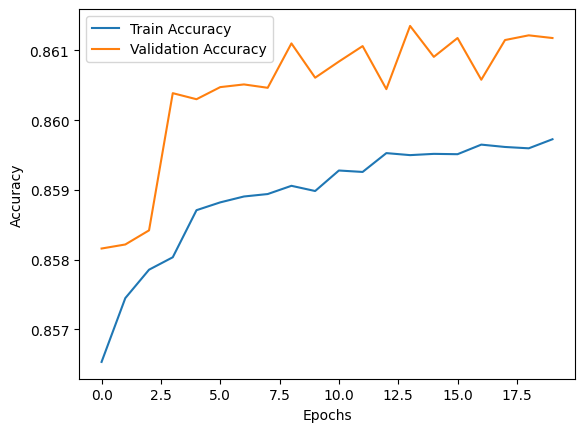

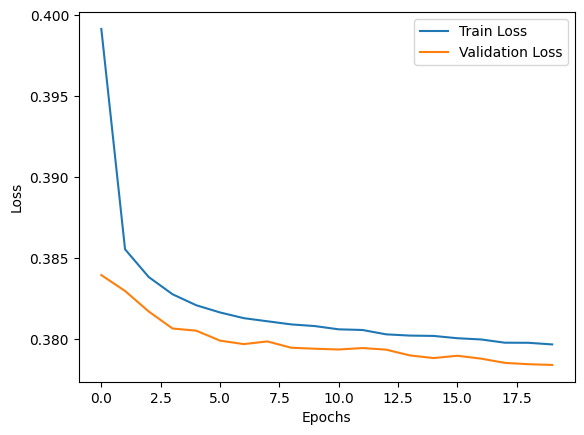

In [33]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [37]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Check first few predictions
print(y_pred[:10])


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


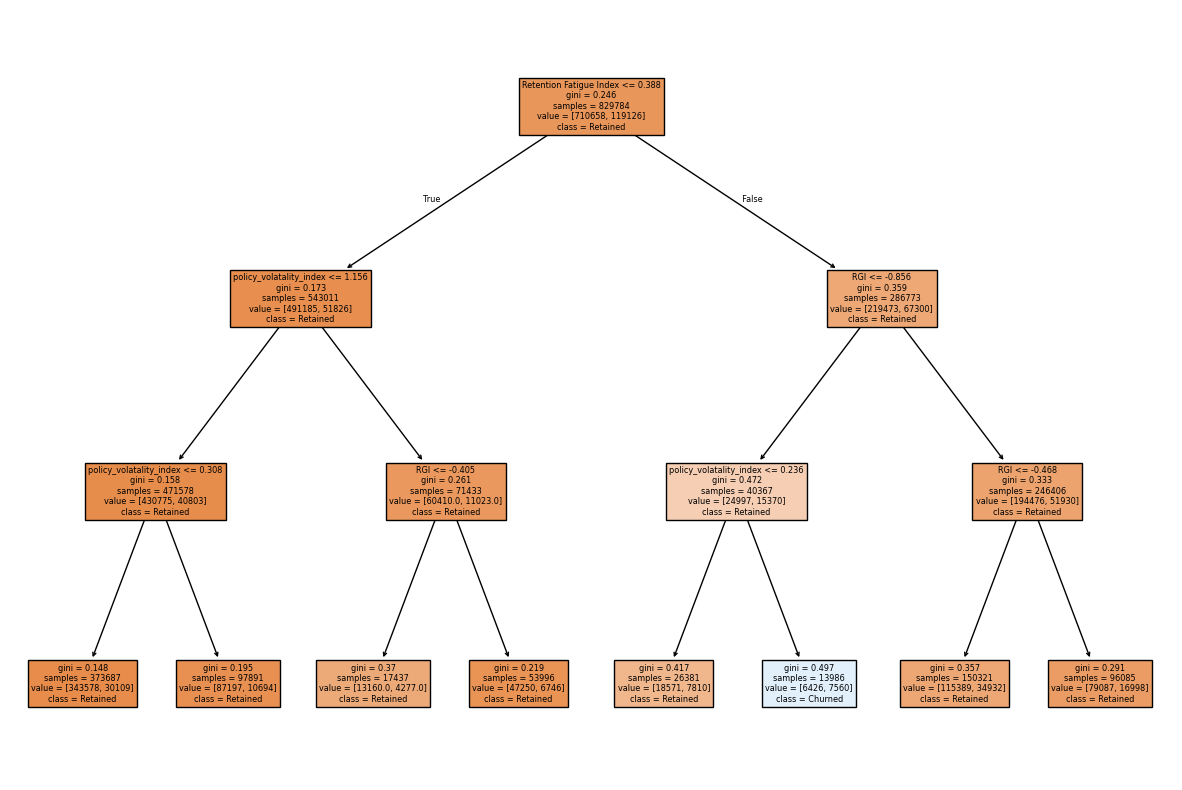

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Decision Tree on the same dataset
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Retained", "Churned"], filled=True)
plt.show()


In [41]:
# Get predictions from the trained MLP model
y_train_pred_prob = model.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)  # Convert to 0 or 1


25931/25931 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Decision Tree on MLP predictions
dt_model = DecisionTreeClassifier(max_depth=3)  # Control tree depth for clarity
dt_model.fit(X_train, y_train_pred)  # Using MLP-generated labels


DecisionTreeClassifier(max_depth=3)

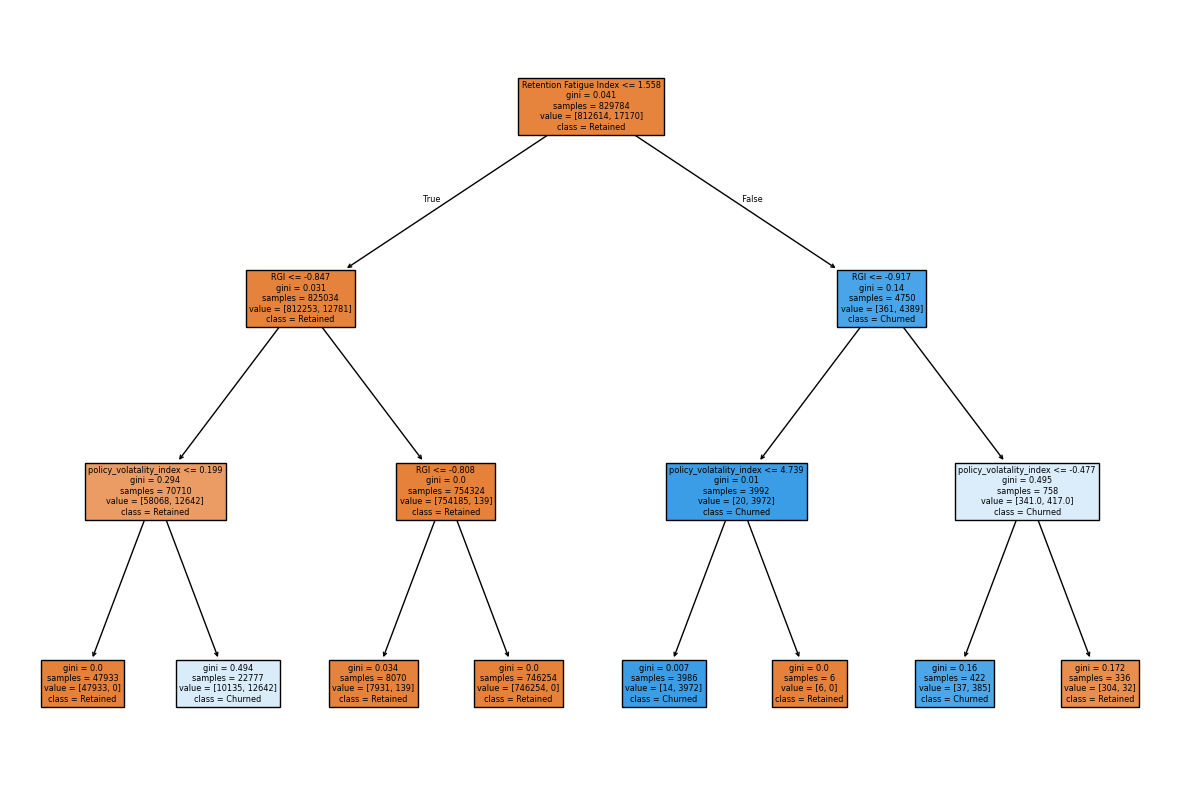

In [43]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Retained", "Churned"], filled=True)
plt.show()


In [45]:
y_pred = model.predict(X_test)
print(y_pred)  # Shows predictions (0 = Retained, 1 = Churned)


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
[[0.10341926]
 [0.12623446]
 [0.09625543]
 ...
 [0.07669029]
 [0.6304781 ]
 [0.22489002]]
